In [74]:
import pandas as pd
import seaborn as sb
import main as m

dataSet = pd.read_csv("C:\\Users\\sergi\\Documents\\dds_datasets\\dds_datasets\\dds_ch2_nyt\\nyt1.csv")
dataSet

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [75]:
normalData = dataSet[(dataSet.Signed_In == 1) & (dataSet.Age > 0)]

def setAgeGroup(age):
    if age < 18:
        return "18-"
    elif age < 25:
        return "18-24"
    elif age < 35:
        return "25-34"
    elif age < 45:
        return "35-44"
    elif age < 55:
        return "45-54"
    elif age < 65:
        return "55-64"
    else:
        return "65+"

normalData["Age_Group"] = normalData.Age.apply(lambda x: setAgeGroup(x))
normalData

C:\Users\sergi\AppData\Local\Temp\ipykernel_17340\3757476715.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalData["Age_Group"] = normalData.Age.apply(lambda x: setAgeGroup(x))


,Age,Gender,Impressions,Clicks,Signed_In,Age_Group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


На цьому графіку можна побачити, що кількість показів оголошень досягає пікового значення для вікової групи 35-44, та мінімального значення на крайніх показниках віку.


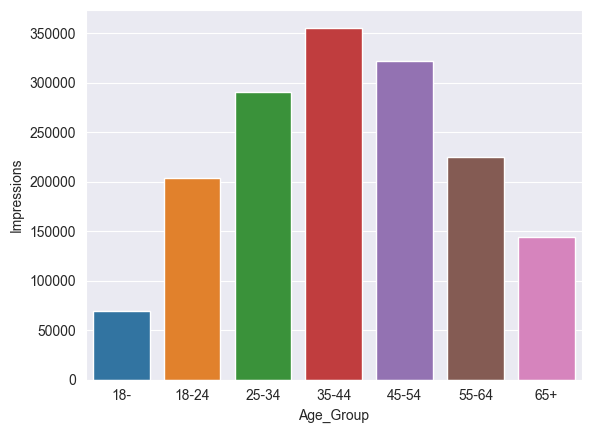

In [76]:
data_byAge = normalData.groupby("Age_Group", as_index=False).sum()
data_byAge["CTR"] = data_byAge.Clicks / data_byAge.Impressions

sb.barplot(data=data_byAge, x = "Age_Group", y = "Impressions")
print("На цьому графіку можна побачити, що кількість показів оголошень досягає пікового значення для вікової групи 35-44, та мінімального значення на крайніх показниках віку.")

Тут видно, що кількість переходів росте повільно, проте майже прямопропорційно до вікової категорії користувачів


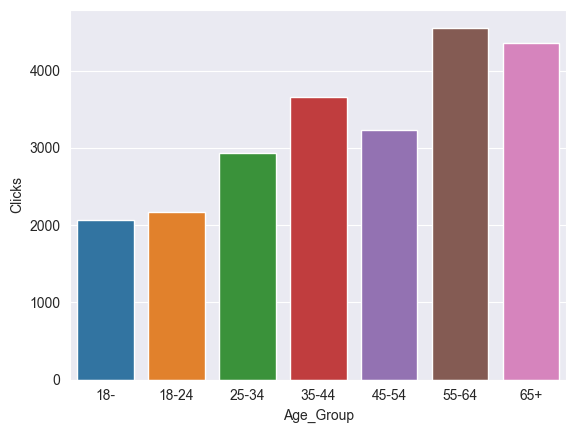

In [77]:
sb.barplot(data = data_byAge, x = "Age_Group", y = "Clicks")
print("Тут видно, що кількість переходів росте повільно, проте майже прямопропорційно до вікової категорії користувачів")

In [78]:
data_avg = data_byAge.drop(["Age", "Impressions", "Clicks", "Signed_In", "Gender"], axis=1)

average_stats = normalData.groupby(["Age_Group"], as_index=False).mean()

data_avg["Avg_Impression"] = average_stats["Impressions"]
data_avg["Avg_Clicks"] = average_stats["Clicks"]
data_avg["Avg_SignedIn"] = average_stats["Signed_In"]

print("Ця таблиця зображує узагальнені дані про переходи та покази, а також CTR - 'коефіцієнт клікабельності', який є відношенням переходів до показів.")

data_avg

Ця таблиця зображує узагальнені дані про переходи та покази, а також CTR - 'коефіцієнт клікабельності', який є відношенням переходів до показів.


,Age_Group,CTR,Avg_Impression,Avg_Clicks,Avg_SignedIn
0,18-,0.029824,5.007159,0.149335,1.0
1,18-24,0.010644,5.002826,0.053251,1.0
2,25-34,0.010110,4.993829,0.050486,1.0
3,35-44,0.010292,5.021507,0.051679,1.0
4,45-54,0.010034,5.010406,0.050274,1.0
5,55-64,0.020277,5.022308,0.101837,1.0
6,65+,0.030183,5.012347,0.151289,1.0


Той ж графік переходів, що був на початку, тільки з розділенням на стать - 0 = жінка, 1 = чоловік


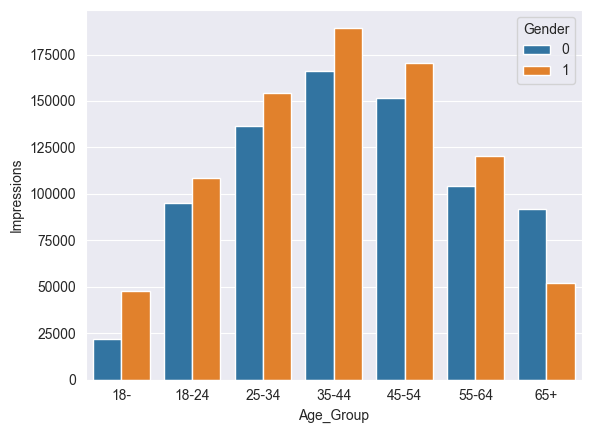

In [79]:
dataAgeAndGender = normalData.groupby(["Age_Group", "Gender"], as_index = False).sum()
dataAgeAndGender["CTR"] = dataAgeAndGender.Clicks / dataAgeAndGender.Impressions

dataCtrAndGender = normalData.groupby(["Age_Group", "Gender"], as_index = False).sum()
sb.barplot(data=dataAgeAndGender,
           x=dataAgeAndGender.Age_Group,
           y=dataAgeAndGender.Impressions,
           hue=dataCtrAndGender.Gender)

print("Той ж графік переходів, що був на початку, тільки з розділенням на стать - 0 = жінка, 1 = чоловік")

Графік з коефіцієнтом клікабельності, CTR, який повинен показувати ефективність реклами/акції серед користувачів


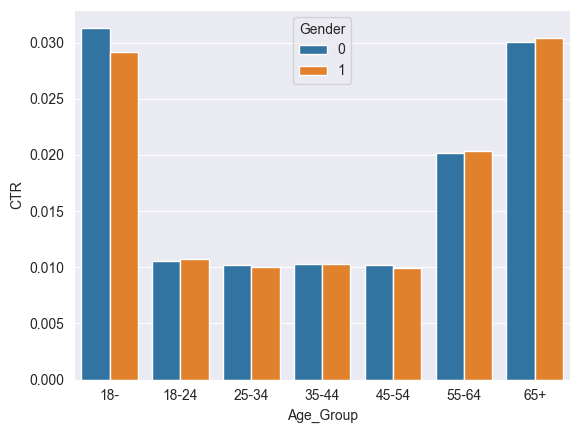

In [80]:
sb.barplot(data=dataAgeAndGender,
           x=dataAgeAndGender.Age_Group,
           y=dataAgeAndGender.CTR,
           hue=dataAgeAndGender.Gender)

print("Графік з коефіцієнтом клікабельності, CTR, який повинен показувати ефективність реклами/акції серед користувачів")

In [81]:
print(m.longRead)

Вперше прочитавши ці графіки, у мене виникла ідея, що величезна к-сть показів для середньої вікової категорії є неефективною, адже коефіцієнт клікабельності більший у наймолодших та найстарших користувачів. Проте переглянувши декілька раз я можу сказати, що цей коефіцієнт не є вирішальним фактором у даному випадку, оскільки різниця у показах величезна, що й значно знижує CTR для користувачів 35-44. На мою думку, CTR може бути показовим тоді, коли по статистиці показів відхилення є у межах норми, у такому випадку дійсно можна на нього опиратись для проведення аналізів та проведення маркетингових рішень. 
